---
# Übungszettel 6, Python Aufgabe
---

**ausgegeben am Mi 27.5.2020 12 Uhr, abzugeben bis Mi 3.6.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: 

Übungsgruppe: Laura Strampe

---

**Einführung**: In Aufgabe 6.4 haben Sie das Vektorpotentiel $\vec{A}$ für ein kreisendes, geladenes Teilchen berechnet. Das geladene, kreisende Teilchen ist dabei ein einfaches Bild für einen Kreistrom oder eine idealisierte Leiterschleife. Wir wollen hier das $\vec{B}$ Feld dieser "Leiterschleife" berechnen und plotten.

In der Vorlesung wurde bereits das Magnetfeld einer Leiterschleife experimentell gezeigt und im Skript auf der Symmetrie-Achse explizit berechnet. Außerhalb dieser Achse ist das Magnetfeld allerdings nicht geschlossen berechenbar und man bedarf der Hilfe von Computern. Selbst langwierige analytische Rechnung führt nur auf Ausdrücke, die, außerhalb der Symmetrieachse, per Computer ausgewertet werden müssen. Eine Alternative stellt hierbei direkte Integration des Biot-Savart-Gesetzes dar, was wir hier zeigen werden. Wir wollen folgende Geometrie verwenden:

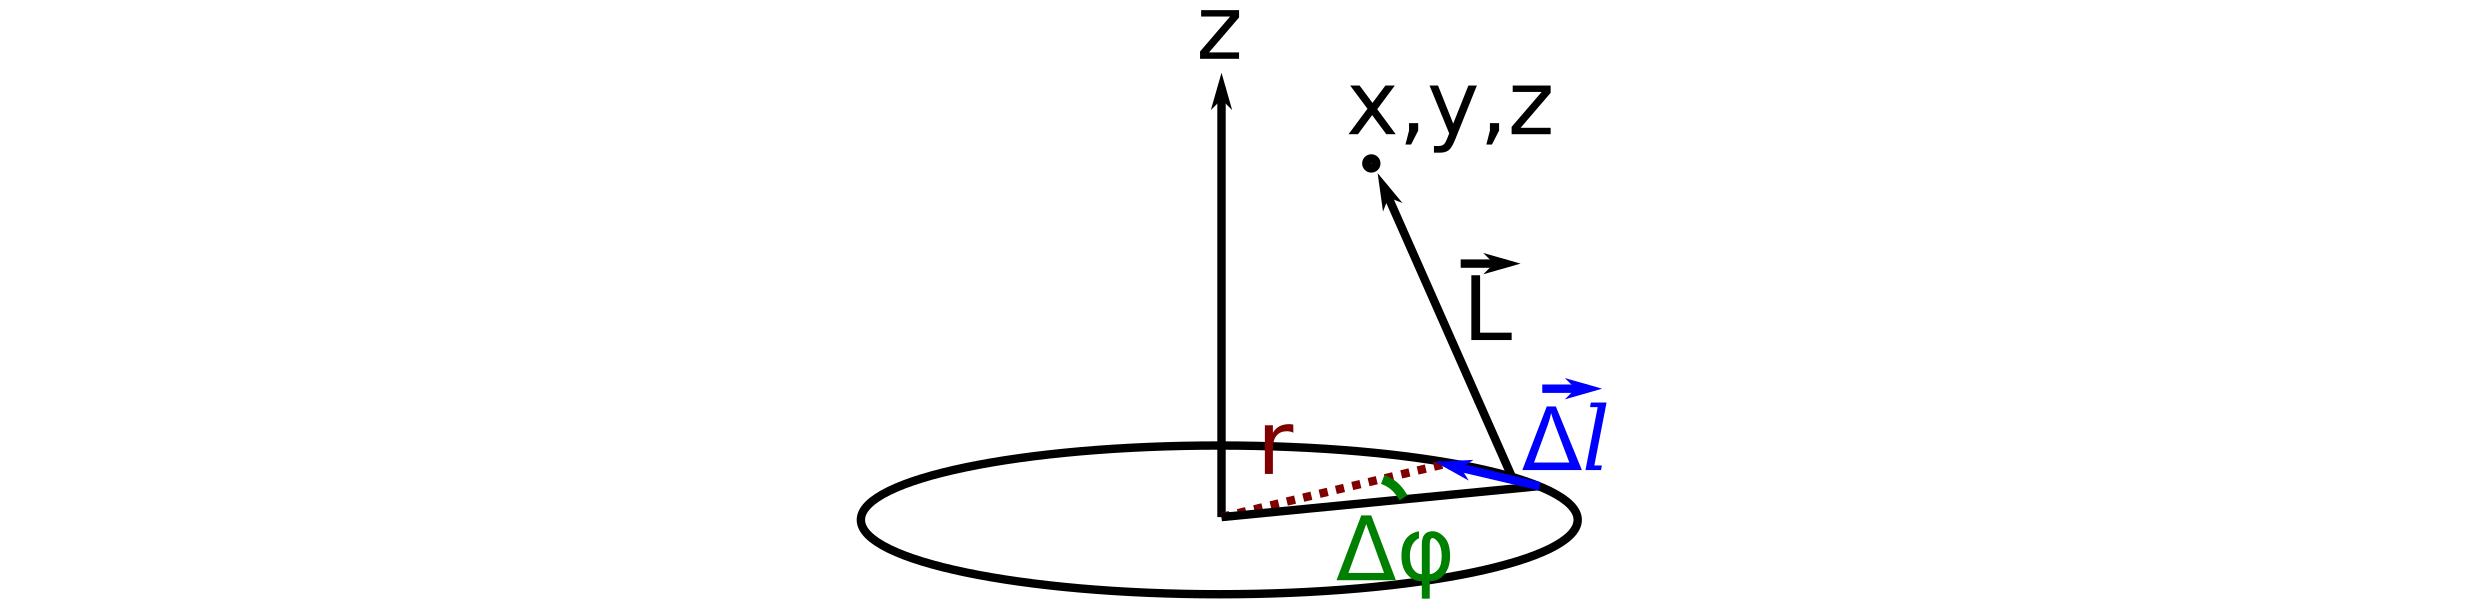

Ziel der Aufgabe soll es sein die Verbindung zwischem dem Biot-Savart-Gesetz und dem Linienverlauf magnetischer Felder zu stärken, sowie die `scipy.integrate.quad_vec` Funktion, `lambda` Operatoren und das `@numpy.vectorize` Makro kennen zu lernen.

**Aufgabe**: Berechnen Sie das magnetische Feld einer kreisförmigen Leiterschleife (Kreisstrom) mit Strom $I$=1 A, Radius $R$=0,1 m in der $x-z$-Ebene (die Schleife liege in der $x-y$-Ebene). Dazu:

1. Schreiben Sie eine Funktion `dB(r,phi)` die das magnetische Feld eines infinitessimal langen Leiterstückes für einen Punkt an der Stelle `r` ausrechnet. Das Linienelement `dl` des Stroms ist dabei `R*np.array([np.sin(phi),-np.cos(phi),0.0])`. Benutzen Sie dafür das Biot-Savart-Gesetz $\vec{\textrm{d}B}\approx\frac{\mu_{0}I}{4\pi}\frac{\vec{\textrm{d}l}\times\vec{L}}{L^{3}}$. Berechnen Sie $\vec{L}$ wie in der Zeichnung.

2. Schreiben Sie eine Funtion `B(x,z)`, die mit Hilfe von `scipy.integrate.quad_vec()` und der Funktion aus *1.* das magnetische Feld durch Integration entlang des Kreisstroms an der Stelle `x,z` berechnet ($y=0$).

3. Erzeugen Sie ein `numpy.meshgrid` aus 2 `numpy.linspace` und werten Sie `B(x,z)` auf dem Gitter aus.

4. Plotten Sie das Magnetfeld des Kreisstroms z.B. mit Hilfe von `streamplot`.

**Vorgehensweise**: Wir empfehlen folgendes Vorgehen, dem Sie jedoch nicht folgen müssen:

1. Schreiben Sie eine Funktion `dB(r,phi)` die das magnetische Feld `dB` eines infinitessimal langen Leiterstückes an der Stelle `R*np.array([np.cos(phi),np.sin(phi),0.0])` für einen Punkt an der Stelle `r` (ein `numpy.array` mit 3 Einträgen für $x,y,z$) ausrechnet. Das Linienelement `dl` des Stroms ist dabei `R*np.array([np.sin(phi),-np.cos(phi),0.0])`. Benutzen Sie dafür das Biot-Savart-Gesetz $\vec{\textrm{d}B}\approx\frac{\mu_{0}I}{4\pi}\frac{\vec{\textrm{d}l}\times\vec{L}}{L^{3}}$. Sie können `np.linalg.norm()` verwenden um die Länge des Vektors $\vec{L}$ zu berechnen. $\vec{L}$ berechnen Sie wie in der Zeichnung.

2. Schreiben Sie eine Funktion `B(x,z)` die für einen Punkt `x,z` durch numerische Integration von `dB` entlang von `phi` (in den Grenzen 0 bis $2\pi$) berechnet und die $x$ bzw. $z$ Komponente zurückgibt. Nutzen Sie dafür `scipy.integrate.quad_vec()`. Speichern Sie nur erste Komponente des Ergebnisses (die zweite wäre der Integrationsfehler) in eine Variable und geben Sie von dieser Variable die erste und dritte Komponente (also die $x$ und $z$ Komponente) zurück. Benutzen Sie einen `lambda` Operator um den Ausdruck etwas zu vereinfachen. 

3. Damit `B(x,z)` auf ein $x,z$ Gitter angewandt werden kann, ergänzen Sie das Makro `@np.vectorize` in der Zeile direkt über der Funktionsdefinition von `B(x,z)`.

4. Erzeugen Sie ein `numpy.meshgrid` aus 2 `numpy.linspace` und werten Sie die Funktion `B(x,z)` auf diesem Gitter aus. Beachten Sie, dass Sie, wenn Sie den Schritten 2. und 3. gefolgt sind die beiden Komponenten des $\vec{B}$-Feldes in $x$ und $z$ Richtung zurück bekommen und daher evtl. so etwas wie `Bx,Bz = B(x,z)` schreiben müssen.

4. Plotten Sie das Magnetfeld des Kreisstroms z.B. mit Hilfe von `streamplot`.

**Hilfestellung**: `scipy.integrate.quad_vec` integriert vektorielle Funktionen, also Funktionen, die ein Argument als Input nehmen und einen Vektor zurückgeben. Hier ein Beispiel:

In [1]:
import numpy as np
from scipy.integrate import quad_vec

def f(x):
    return np.array([x, x**2, x**3])

result = quad_vec(f,0.0,1.0)
print(result[0])
print(result[1])


[0.5        0.33333333 0.25      ]
2.193475134535022e-14


Dabei wird als erstes Argument von `quad_vec` die zu integrierende Funktion und dann die Integrationsgrenzen übergeben, hier von 0 bis 1. Als Ergebnis erhalten wir den Integrationsvektor als erste Komponente und den geschätzten Integrationsfehler als zweites Argument.

`lambda` Operatoren können benutzt werden um namenlose Funktionen zu definieren. Das ist vor allem praktisch um kurze Funktionen zu definieren, die nur an einer Stelle im Code benutzt werden sollen. Die Schreibweise ist dabei ähnlich wie eine Schreibweise der Mathematik für Funktionen. Formal wäre z.B. unsere Beispielfunktion oben in etwa $f:x\rightarrow\begin{pmatrix}x & x^{2} & x^{3}\end{pmatrix}$. Äquivalent wäre die Integration von oben mit Hilfe vom Lambda-Operator kurz:

In [2]:
result = quad_vec(lambda x: np.array([x, x**2, x**3]),0.0,1.0)
print(result[0])
print(result[1])

[0.5        0.33333333 0.25      ]
2.193475134535022e-14


Das `@numpy.vectorize` Makro erlaubt das Schreiben einer Funktion für skalare Argumente (also einzelne Punkte) und lässt `numpy` eine Version erzeugen, die auf ein Gitter angewandt werden kann. Wollen wir z.B. das Integral von oben an mehreren oberen Grenzen auswerten:

In [3]:
y = np.linspace(1,5,4)

@np.vectorize
def integral(z):
    result = quad_vec(lambda x: np.array([x, x**2, x**3]),0.0,z)[0]
    return result[0], result[1], result[2]

print(integral(y))

(array([ 0.5       ,  2.72222222,  6.72222222, 12.5       ]), array([ 0.33333333,  4.2345679 , 16.43209877, 41.66666667]), array([  0.25      ,   7.41049383,  45.1882716 , 156.25      ]))


Text(0, 0.5, 'z in m')

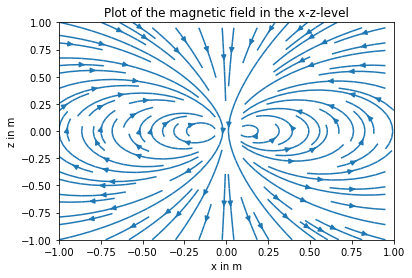

In [4]:
import matplotlib.pyplot as plt
import numpy as np

##Konstanten und Variablen
mu0 = 1.257e-6
I = 1
R = 0.1


def dB(r,phi):
    rl = R*np.array([np.cos(phi),np.sin(phi),0.0])
    dl = R*np.array([np.sin(phi),-np.cos(phi),0.0])
    L = r - rl
    bL = np.linalg.norm(L)
    
    return mu0*I/(4*np.pi) * np.cross(dl,L)/bL**3

@np.vectorize
def B(x,z):
    result = quad_vec(lambda phi: dB([x,0,z],phi),0.0,2*np.pi)[0]
    return result[0], result[2]
    
x = np.linspace(-1,1,100)
z = np.linspace(-1,1,100)
rx,rz = np.meshgrid(x,z)

Bx, Bz = B(rx,rz)
plt.streamplot(rx,rz,Bx,Bz)
plt.title("Plot of the magnetic field in the x-z-level")
plt.xlabel("x in m")
plt.ylabel("z in m")